In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

import seaborn as sns

In [2]:
ventas = pd.read_csv('ventas.csv')
ventas

,codigo_producto,codigo_fabricante,mes,ventas_mensuales
0,1234,123,enero,1500
1,3581,101,febrero,31678
2,9578,76,junio,11000
3,6789,455,mayo,1350
4,1534,144,diciembre,1000
5,1234,76,marzo,999
6,9578,455,marzo,855
7,3581,455,marzo,934
8,1234,76,febrero,123
9,3581,123,febrero,231


In [3]:
ventas_por_codigo_producto = ventas.set_index('codigo_producto')
ventas_por_codigo_producto

,codigo_fabricante,mes,ventas_mensuales
codigo_producto,,,
1234,123,enero,1500
3581,101,febrero,31678
9578,76,junio,11000
6789,455,mayo,1350
1534,144,diciembre,1000
1234,76,marzo,999
9578,455,marzo,855
3581,455,marzo,934
1234,76,febrero,123


In [40]:
#obtengo un nuevo dataframe con 3 columnas: min, max y promedio de ventas mensuales
datos_ventas_por_codigo_producto = ventas_por_codigo_producto.groupby('codigo_producto').agg({'ventas_mensuales':['min','max','mean']})
datos_ventas_por_codigo_producto

ventas_mensuales                
                             min    max     mean
codigo_producto                                 
1234                         123   1500   874.00
1534                        1000   1000  1000.00
3581                         222  31678  8266.25
5567                         222    222   222.00
6789                         100   1350   520.00
9578                         855  11000  4285.00

In [41]:
#ajusto los nombres de las columnas
datos_ventas_por_codigo_producto.columns = ['minimo_ventas','maximo_ventas','promedio_ventas']
datos_ventas_por_codigo_producto

,minimo_ventas,maximo_ventas,promedio_ventas
codigo_producto,,,
1234,123,1500,874.00
1534,1000,1000,1000.00
3581,222,31678,8266.25
5567,222,222,222.00
6789,100,1350,520.00
9578,855,11000,4285.00


In [42]:
#metodo stack me reordena en filas la informacion
datos_ventas_por_codigo_producto_stack = datos_ventas_por_codigo_producto.stack()
datos_ventas_por_codigo_producto_stack

codigo_producto                 
1234             minimo_ventas        123.00
                 maximo_ventas       1500.00
                 promedio_ventas      874.00
1534             minimo_ventas       1000.00
                 maximo_ventas       1000.00
                 promedio_ventas     1000.00
3581             minimo_ventas        222.00
                 maximo_ventas      31678.00
                 promedio_ventas     8266.25
5567             minimo_ventas        222.00
                 maximo_ventas        222.00
                 promedio_ventas      222.00
6789             minimo_ventas        100.00
                 maximo_ventas       1350.00
                 promedio_ventas      520.00
9578             minimo_ventas        855.00
                 maximo_ventas      11000.00
                 promedio_ventas     4285.00
dtype: float64

In [46]:
#otra visualizacion de datos_ventas_por_codigo_producto por metodo 'unstack'
datos_ventas_por_codigo_producto_unstack = datos_ventas_por_codigo_producto.unstack()
datos_ventas_por_codigo_producto_unstack

                 codigo_producto
minimo_ventas    1234                 123.00
                 1534                1000.00
                 3581                 222.00
                 5567                 222.00
                 6789                 100.00
                 9578                 855.00
maximo_ventas    1234                1500.00
                 1534                1000.00
                 3581               31678.00
                 5567                 222.00
                 6789                1350.00
                 9578               11000.00
promedio_ventas  1234                 874.00
                 1534                1000.00
                 3581                8266.25
                 5567                 222.00
                 6789                 520.00
                 9578                4285.00
dtype: float64

In [47]:
ventas_por_codigo_producto

,codigo_fabricante,mes,ventas_mensuales
codigo_producto,,,
1234,123,enero,1500
3581,101,febrero,31678
9578,76,junio,11000
6789,455,mayo,1350
1534,144,diciembre,1000
1234,76,marzo,999
9578,455,marzo,855
3581,455,marzo,934
1234,76,febrero,123


In [59]:
ventas_por_codigo_producto['codigo_fabricante'].value_counts()

76     5
455    5
123    3
101    1
144    1
Name: codigo_fabricante, dtype: int64

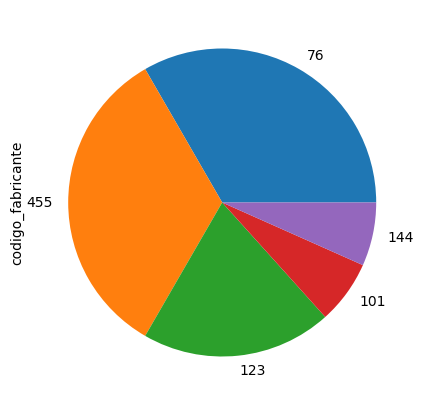

In [61]:
ventas_por_codigo_producto['codigo_fabricante'].value_counts().plot(kind='pie')